# Imports

In [18]:
#Install once
#!pip install imbalanced-learn
#!pip install delayed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier



%matplotlib inline

## Load splitted data

In [20]:
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train.head()

,user_state,click,hour,screen_resolution,video,score,editors_choice,price,iap,installs,bids,5,4,3,2,1
0,43,0,9,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
1,14,0,13,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
2,9,0,12,3.294503,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
3,9,0,22,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
4,9,0,12,3.294503,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0


In [21]:
train.describe()

,user_state,click,hour,screen_resolution,video,score,price,installs,bids,5,4,3,2,1
count,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06,2.287166e+06
mean,2.345409e+01,7.082652e-02,1.090597e+01,2.771343e-02,4.367759e-01,4.815064e-01,8.141424e-04,1.446645e+00,1.006787e+05,5.981456e+05,1.027749e+05,4.477865e+04,1.860776e+04,4.038448e+04
std,1.504118e+01,2.565349e-01,6.796615e+00,1.002409e+00,4.959867e-01,8.307067e-01,4.623112e-02,8.429245e+00,3.680311e+05,3.136000e+06,5.167666e+05,2.307362e+05,9.946773e+04,2.111435e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.641122e+00,0.000000e+00,-7.891736e+00,0.000000e+00,-1.422502e-01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,5.000000e+00,-5.309330e-01,0.000000e+00,8.000278e-02,0.000000e+00,-1.134906e-01,2.919000e+03,4.884000e+03,8.370000e+02,4.050000e+02,1.080000e+02,2.680000e+02
50%,2.200000e+01,0.000000e+00,9.000000e+00,-5.309330e-01,0.000000e+00,6.371482e-01,0.000000e+00,-8.472516e-02,2.311800e+04,2.256900e+04,4.324000e+03,1.522000e+03,4.380000e+02,1.261000e+03
75%,3.800000e+01,0.000000e+00,1.700000e+01,8.573300e-01,1.000000e+00,1.114297e+00,0.000000e+00,1.453980e-01,1.106680e+05,1.079620e+05,2.050200e+04,8.766000e+03,2.470000e+03,6.091000e+03
max,5.000000e+01,1.000000e+00,2.300000e+01,3.772682e+00,1.000000e+00,1.982327e+00,2.638793e+00,5.738854e+01,1.351376e+07,2.121390e+07,3.489709e+06,1.564090e+06,6.749540e+05,1.432223e+06


In [22]:
print(f'Click percent in train data: {train.click.sum()/train.shape[0]*100}')
print(f'Click percent in test data: {test.click.sum()/test.shape[0]*100}')

train.head()

Click percent in train data: 7.0826516308829355
Click percent in test data: 7.886337981272891


,user_state,click,hour,screen_resolution,video,score,editors_choice,price,iap,installs,bids,5,4,3,2,1
0,43,0,9,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
1,14,0,13,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
2,9,0,12,3.294503,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
3,9,0,22,-0.530933,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0
4,9,0,12,3.294503,1,0.323989,False,0.0,True,0.433052,10460,112010.0,15502.0,9283.0,3189.0,15145.0


# Check for imbalance

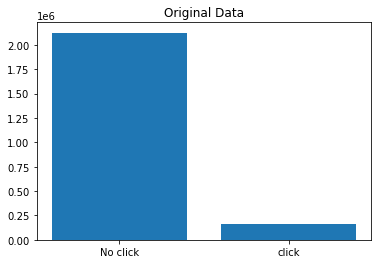

In [23]:
#Imbalanced data

X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']


plt.bar(['No click', 'click'], height=[sum(y_train==0), sum(y_train==1)])
plt.title('Original Data')
plt.show()

# Run Random forest with balnced data

and see if this is the right way or we should find some other ways


we do the sampling on train data only

In [29]:
# Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Random Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

for X, y, method in [(X_oversampled, y_oversampled, 'Oversampling'), 
                     (X_smote, y_smote, 'SMOTE'), 
                     (X_undersampled, y_undersampled, 'Undersampling')]:
    clf = RandomForestClassifier(n_estimators=100, max_depth=4)
    clf.fit(X, y)
    print(f'Method: {method}')
    print(f'Train: {clf.score(X, y)}, Test: {clf.score(X_test, y_test)}')

Method: Oversampling
Train: 0.5833376467056345, Test: 0.3334876330158008
Method: SMOTE
Train: 0.6398610184389608, Test: 0.46776625493014556
Method: Undersampling
Train: 0.5796119561459825, Test: 0.31624938077101117


# Feature importance check
to see how model can be improved and efficient

In [30]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(train, round(importance, 2)) for train, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Mean Absolute Error: 0.15
Variable: user_state           Importance: 0.34
Variable: hour                 Importance: 0.33
Variable: screen_resolution    Importance: 0.14
Variable: bids                 Importance: 0.04
Variable: score                Importance: 0.03
Variable: 5                    Importance: 0.02
Variable: 4                    Importance: 0.02
Variable: 3                    Importance: 0.02
Variable: 2                    Importance: 0.02
Variable: 1                    Importance: 0.02
Variable: installs             Importance: 0.01
Variable: video                Importance: 0.0
Variable: editors_choice       Importance: 0.0
Variable: price                Importance: 0.0
Variable: iap                  Importance: 0.0
